<a href="https://colab.research.google.com/github/das109/lecture/blob/main/KoBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#미리 만들어놓은 데이터 다운로드

https://drive.google.com/drive/folders/1DHC1WKeK1TvFHai1Tf9MEMTgIS1kflwE?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/drive/MyDrive/data/train.tsv",sep='\t')
df.head()

,news,summary
0,중소기업청은 올해 기술혁신형 중소기업(이노비즈) 육성사업의 1차 온라인 자가진단을 ...,이노비즈 현장평가 기업 6백70개 선정
1,대학원생들이 함께 팀을 이뤄 실제 연구 과제를 수행해보면 연구현장을 경험해 보는 기...,KIRD|| '국가R&D 리얼챌린지 프로그램' 실시
2,거제도에 위치한 석유비축기지를 방문한 과학자들. 2년간 70회의 만남의 통해 과제를...,과학자 246명 전국 랩 구석구석···융합연구단 비화
3,"낮은 구름, 선선한 날씨, 야외 활동하기에 더없이 좋은 날. 5일 오전 10시부터 ...",[화보] '의기양양' '의젓' 체험하고 과학자 꿈 키우고
4,엑스포과학공원을 창조경제의 중심지로 만들자는 주장이 갈수록 확산되고 있다. 새 정부...,엑스포과학공원 '창조경제 전초기지화' 여론 확산


In [ ]:
!git clone https://github.com/das109/lecture.git
!cd /content/KoBART-summarization
!pip install git+https://github.com/SKT-AI/KoBART#egg=kobart

Cloning into 'lecture'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/bin/bash: line 0: cd: /content/KoBART-summarization: No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKT-AI/KoBART to /tmp/pip-install-6hn6dsi3/kobart_c466f32769b54d8db610decf7241e8c5
  Running command git clone -q https://github.com/SKT-AI/KoBART /tmp/pip-install-6hn6dsi3/kobart_c466f32769b54d8db610decf7241e8c5
     |████████████████████████████████| 132 kB 7.4 MB/s 
     |████████████████████████████████| 814 kB 52.6 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 1.9 MB 51.7 MB/s 
     |████████████████████████████████| 829 kB 55.7 MB/s 
     |██████████████████████

In [ ]:
!pip install -r /content/lecture/KoBART-summarization/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████▎ | 834.1 MB 83.1 MB/s eta 0:00:01tcmalloc: large alloc 1147494400 bytes == 0x38d04000 @  0x7fc34a60d615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 881.9 MB 20 kB/s 
     |████████████████████████████████| 2.5 MB 46.4 MB/s 
     |████████████████████████████████| 813 kB 63.7 MB/s 
     |████████████████████████████████| 8.3 MB 52.7 MB/s 
     |████████████████████████████████| 529 kB 73.1 MB/s 
     |████████████████████████████████| 636 kB 61.6 MB/s 
     |████████████████████████████████| 182 kB 65.3 MB/s 
     |████████████████████████████████| 4.7 MB 45.4 MB/s 
     |████████████████████

In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 65.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.7.1+cu101 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.7.1+cu101 which is incompatible.

In [ ]:
!pip install torchmetrics==0.6.0
!pip install torchtext==0.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 329 kB 9.0 MB/s 
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 0.10.2
    Uninstalling torchmetrics-0.10.2:
      Successfully uninstalled torchmetrics-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kobart 0.5.1 requires pytorch-lightning==1.2.1, but you have pytorch-lightning 1.3.8 which is incompatible.
kobart 0.5.1 requires transformers==4.3.3, but you have transformers 4.8.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.9 MB 7.6 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Suc

In [ ]:
!pip install pytorch_lightning==1.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.6 MB/s 
  Attempting uninstall: pyDeprecate
    Found existing installation: pyDeprecate 0.3.0
    Uninstalling pyDeprecate-0.3.0:
      Successfully uninstalled pyDeprecate-0.3.0
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.3.8
    Uninstalling pytorch-lightning-1.3.8:
      Successfully uninstalled pytorch-lightning-1.3.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kobart 0.5.1 requires pytorch-lightning==1.2.1, but you have pytorch-lightning 1.5.2 which is incompatible.
kobart 0.5.1 requires transformers==4.3.3, but you have transformers 4.8.2 which is incompatible.


In [ ]:
!nvidia-smi

Tue Nov  1 01:57:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!python /content/lecture/KoBART-summarization/train.py  --gradient_clip_val 1.0 --max_epochs 1 --default_root_dir logs  --gpus 1 --batch_size 4 --num_workers 4

Downloading: 100% 4.00/4.00 [00:00<00:00, 2.51kB/s]
Downloading: 100% 111/111 [00:00<00:00, 70.9kB/s]
Downloading: 100% 682k/682k [00:00<00:00, 2.59MB/s]
INFO:root:Namespace(accelerator=None, accumulate_grad_batches=None, amp_backend='native', amp_level=None, auto_lr_find=False, auto_scale_batch_size=False, auto_select_gpus=False, batch_size=4, benchmark=False, check_val_every_n_epoch=1, checkpoint_callback=None, checkpoint_path=None, default_root_dir='logs', detect_anomaly=False, deterministic=False, devices=None, enable_checkpointing=True, enable_model_summary=True, enable_progress_bar=True, fast_dev_run=False, flush_logs_every_n_steps=None, gpus=1, gradient_clip_algorithm=None, gradient_clip_val=1.0, ipus=None, limit_predict_batches=1.0, limit_test_batches=1.0, limit_train_batches=1.0, limit_val_batches=1.0, log_every_n_steps=50, log_gpu_memory=None, logger=True, lr=3e-05, max_epochs=1, max_len=512, max_steps=-1, max_time=None, min_epochs=None, min_steps=None, model_path=None, move_

In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#/content/logs/model_chp/epoch=00-val_loss=1.353.ckpt 파일 이름 고치기

In [ ]:
!python /content/lecture/KoBART-summarization/get_model_binary.py --hparams /content/logs/tb_logs/default/version_0/hparams.yaml --model_binary /content/logs/model_chp/epoch=00-val_loss=2.291.ckpt

/content/lecture/KoBART-summarization/get_model_binary.py:13: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  hparams = yaml.load(f)


In [ ]:
import torch
from transformers import PreTrainedTokenizerFast
from transformers.models.bart import BartForConditionalGeneration

model = BartForConditionalGeneration.from_pretrained('/content/kobart_summary')
tokenizer = PreTrainedTokenizerFast.from_pretrained('gogamza/kobart-base-v1')

text = input()

if text:
    input_ids = tokenizer.encode(text)
    input_ids = torch.tensor(input_ids)
    input_ids = input_ids.unsqueeze(0)
    output = model.generate(input_ids, eos_token_id=1, max_length=512, num_beams=5)
    output = tokenizer.decode(output[0], skip_special_tokens=True)
    print("")
    print("요약: ", end="")
    print(output)

메타(옛 페이스북)가 운영하는 소셜미디어인 인스타그램에서 로그인이 되지 않고 계정이 차단되는 등의 장애가 발생했다. 해당 오류는 약 8시간 30분가량 계속됐다.  인스타그램 측은 1일 공식 트위터 계정을 통해 "버그를 해결했다. 세계 여러 지역의 사람들이 계정에 접속하는 데 문제가 있었고 일부 팔로워 수가 일시적으로 변경되도록 했다. 미안하다"라며 장애가 복구됐다고 알렸다.  오류는 전날 오후 10시 30분께부터 발생해 이날 오전 7시가 되어서야 복구됐다.  인스타그램에 로그인하면 '회원님의 계정을 일시 차단했다', '확인할 수 없는 계정은 영구적으로 비활성화된다'는 메시지가 떴다. 이에 계정이 해킹된 게 아니냐는 우려도 나왔다.  인터넷서비스 접속 장애 모니터링 업체 '다운디텍터'에 따르면 전날 장애가 발생한 지 약 30분만인 밤 11시께 7300건 이상의 접속 불량 사태가 보고됐다.

요약: 인스타그램 접속 장애···오류 8시간 30분


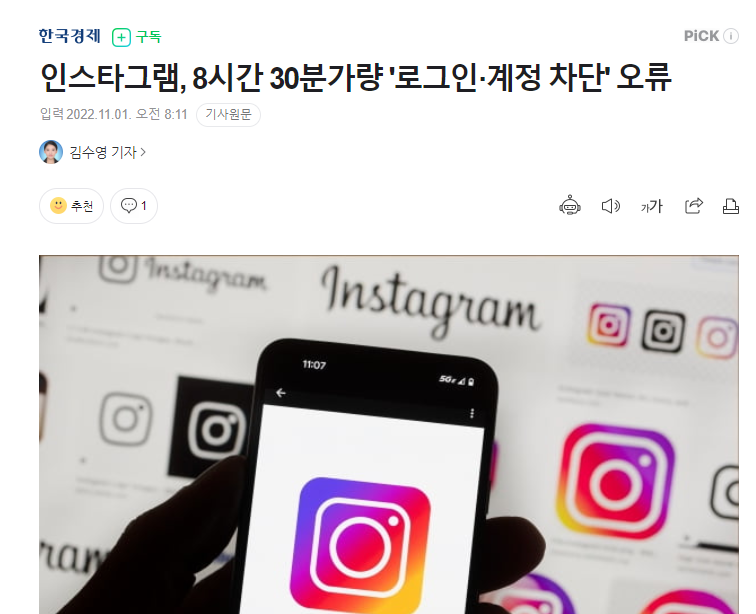